<a href="https://colab.research.google.com/github/FGalvao77/Utilizando-tecnicas-de-ML-para-predizer-turnover-de-funcionarios/blob/main/Utilizando_t%C3%A9cnicas_de_ML_para_predizer_turnover_de_funcion%C3%A1rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Utilizando técnicas de ML para predizer turnover de funcionários**

---



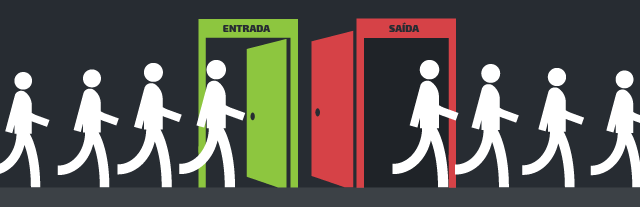

## **1. Introdução**

**O que é o `Turnover`?**

A `rotatividade de Pessoal` (ou **Turnover** em inglês), no contexto de _Gestão de Pessoas_, está relacionada com o desligamento de alguns funcionários e entrada de outros para substituí-los, ou seja, a rotatividade é caracterizada pelo fluxo de entradas (admissões) e saídas (desligamentos, demissões, remanejamentos e aposentadorias) de pessoas em uma organização.

- Fonte: https://pt.wikipedia.org/wiki/Rotatividade_de_pessoal

Para esse desafio, utilizarei um conjunto de dados da biblioteca do `PyCaret` o dataset **[employee](https://pycaret.org/get-data/)**.

**Official Page:** https://pycaret.org/

Melhor forma para aprender é **"botar a mão na massa!"**

Então vamos lá!!!!



## **2. Instalando a biblioteca**

In [1]:
# primeiro vamos atualizar os diretórios
!apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [2]:
# importando a biblioteca para ignorar "erros"
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# comando para instalar a biblioteca
!pip install pycaret

In [4]:
# removendo aplicações obsoletas
!apt autoremove

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


## **3. Carregando o conjunto de dados**

Para nossa atividade prática, usaremos uma função própria da biblioteca que nos fornece uma gama de `datasets`.

Segue o comando:

```python
# importando a função 
from pycaret.datasets import get_data
```

In [5]:
# importando a função para carregamento de datasets
from pycaret.datasets import get_data

Através do comando abaixo:
```python 
get_data('index')
```
Podemos visualizar os conjuntos de dados fornecidos pelo `PyCaret`.

In [6]:
# visualizando os datasets embutidos no pycaret
get_data('index');

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


> Iremos trabalhar com um case de classificação chamado `"employee"`.

O dataset em questão contém observações de funcionários de uma empresa e, o objetivo é predizer, dado algumas variáveis se o funcionário irá deixar ou não a empresa.

In [7]:
# usaremos a função "get_data()" e passando como argumento entre aspas - simples ou duplas o dataset de interesse
get_data('employee');

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


Antes de tudo, vamos criar um objeto instanciando o conjunto de dados de interesse.

In [8]:
# criando o objeto "df"
df = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


Depois de criado o objeto, podemos partir para a próxima etapa.

## **4. Análise exploratória de dados**

### **4.1. Análise exploratória de dados - linha de código**

In [9]:
# tipo do objeto criado
type(df)

pandas.core.frame.DataFrame

In [10]:
# nome das colunas
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'left'],
      dtype='object')

Vamos entender melhor que cada coluna representa.

**Dicionário:**
- ``'satisfaction_level'``:  _nível de satisfação_;

- ``'last_evalution'``:  _última avaliação_;

- ``'number_project'``:  _número de projetos_;

- ``'average_montly_hours'``:  _média de horas trabalhadas por mês_;

- ``'time_spend_company'``:  _tempo de permanência na empresa_;

- ``'Work_accident'``:  _acidente de trabalho_;

- ``'promotion_last_5years'``:  _promoção nos últimos 5 anos_;

- ``'department'``:  _departamento_;

- ``'salary'``:  _salário_;

- ``'left'``:  _saída_ <br> 
    - essa é a variável alvo - valor categórico:
     - 0: não | 1: sim

In [11]:
# visualizando o tipo de dado das colunas
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object

> Veja que temos duas variáveis do tipo **object**:        
- `salary` e 
- `department`.

Já as demais são numéricas do tipo `float64` e `int64`.

In [12]:
# dimensão do dataset
df.shape    # linhas e colunas

(14999, 10)

> Veja que esse conjunto de dados possui `10 colunas` e `14.999 linhas`.

In [13]:
# contabilizando se há valores nulos
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

Podemos também incluir no final do comando acima a função `".any()"`, que irá retornar um valor boleano:    

- `True`: se houver valores nulos ou,
- `False`: sem ausência de valores nulos.

In [14]:
# visualizando se há valores nulos - resposta boleana
df.isna().sum().any()

False

> Como já era de conhecimento, não há valores nulos.

In [15]:
# contabilizando as instâncias únicas presentes nas colunas
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
promotion_last_5years      2
department                10
salary                     3
left                       2
dtype: int64

Vamos explorar a variável alvo "left".

In [16]:
# contabilizando as instâncias únicas da variável alvo
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Iremos visualizar a distribuição das instâncias da variável alvo, frequências:            
- absoluta.
- relativa.

In [17]:
# importando a biblioteca pandas para modelagem de dados
import pandas as pd

In [18]:
# tabela de frequência (absoluta e relativa) da variável alvo - "left"
tbl_freq_left = pd.DataFrame(df['left'].value_counts())

tbl_freq_left.rename(columns = {'left':'freq_abs_left'}, 
                     inplace = True)

tbl_freq_left['freq_relativa_left'] = round(tbl_freq_left.freq_abs_left / 
                                            tbl_freq_left.freq_abs_left.sum(),3)

print(tbl_freq_left)

   freq_abs_left  freq_relativa_left
0          11428               0.762
1           3571               0.238


> A variável alvo possui um desbalanceamento da quantidade de instâncias presentes. E isso é um problema para nossa análise.

Já que o modelo quando tiver `contato` com um número mais presente de uma determinada instância pode fazer **inferências** equivocadas.

Este problema trataremos mais a frente!

Vamos explorar mais as variáveis, utilizando ferramentas gráficas como gráfico de barras, histogramas e etc.

### **4.2 Análise exploratória de dados - gráficos**

Podemos visualmente analisar a incidência ou não de valores nulos e/ou faltantes no conjunto de dados.

Para isso, temos a biblioteca `missingno`.

In [19]:
# comando para instalar a biblioteca
# caso necessário, descomente a linha
#!pip install missingno

In [20]:
# importando a biblioteca
import missingno as msno

> A biblioteca `MissingNo` permite a visualização de forma gráfica de dados nulos/faltantes no dataset, funciona com datasets tradicionais e também se mostra muito útil para dados como _séries temporais_.

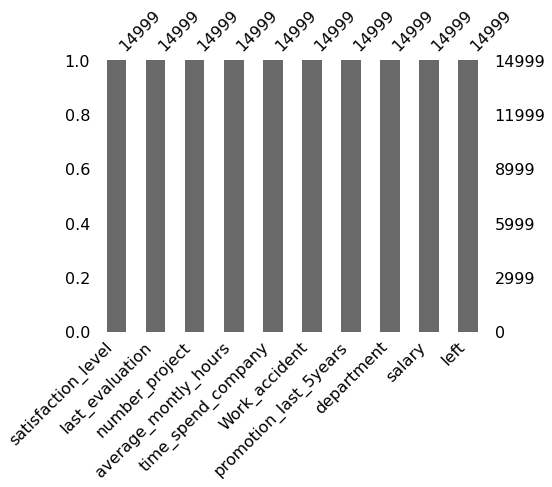

In [21]:
# plotando gráfico de barras com a função ".bar()" da biblioteca "missingno"
msno.bar(df, figsize=(7, 5));

In [22]:
# importando as bibliotecas para visualização gráfica e definido a configuração de exibição
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

sns.set_theme(style='ticks')

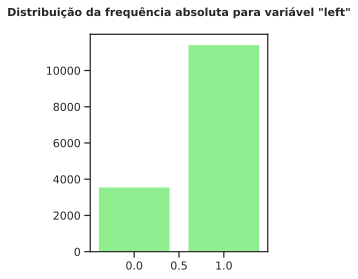

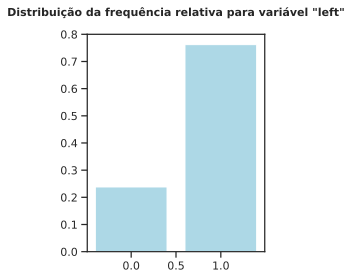

In [23]:
# plotando gráficos das distribuições absoluta e relativa da coluna "left"
plt.figure(figsize=[7, 4])
plt.subplots_adjust(wspace=0.2)
plt.subplot(1,2,1)
plt.bar(df['left'].unique(), df['left'].value_counts(), color = 'lightgreen')
plt.title('Distribuição da frequência absoluta para variável "left"\n', 
          {'fontsize': 11,'fontweight': 'bold'})
plt.show();

plt.figure(figsize=[7, 4])
plt.subplot(1,2,2)
plt.bar(df['left'].unique(), df['left'].value_counts(normalize=True), color = 'lightblue')
plt.title('Distribuição da frequência relativa para variável "left"\n', 
          {'fontsize': 11,'fontweight': 'bold'})
plt.show();

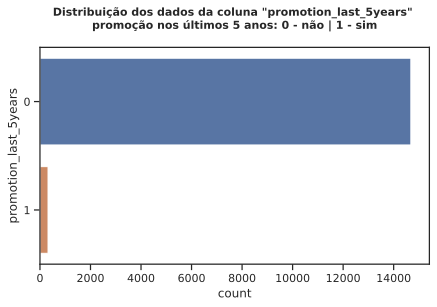

In [24]:
# usando a função ".countplot()" da biblioteca seaborn
# visualizando a distribuição dos dados da variável "promotion_last_5years"
plt.figure(figsize=(7, 4))
plt.title('Distribuição dos dados da coluna "promotion_last_5years" \npromoção nos últimos 5 anos: 0 - não | 1 - sim\n', 
         fontsize = 11, fontweight = 'bold')
sns.countplot(data=df, y='promotion_last_5years');

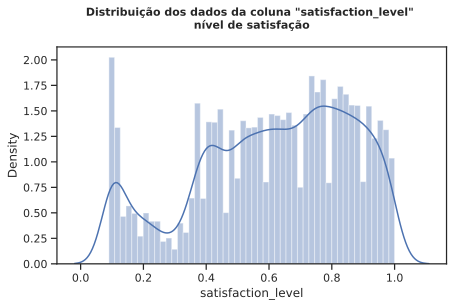

In [25]:
# visualizando a distribuição dos dados da variável nível de satisfação - "satisfaction_level"
plt.figure(figsize=(7, 4))
plt.title('Distribuição dos dados da coluna "satisfaction_level" \nnível de satisfação\n', 
         fontsize = 11, fontweight = 'bold')
sns.distplot(df['satisfaction_level'], bins=50)
plt.show();

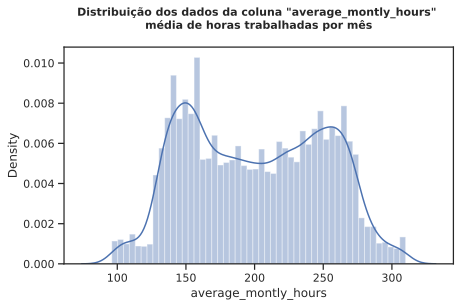

In [26]:
# visualizando a distribuição dos dados da coluna "average_montly_hours" - média de horas trabalhadas por mês
plt.figure(figsize=(7, 4))
plt.title('Distribuição dos dados da coluna "average_montly_hours" \nmédia de horas trabalhadas por mês\n', 
         fontsize = 11, fontweight = 'bold')
sns.distplot(df['average_montly_hours'], bins=50)
plt.show();

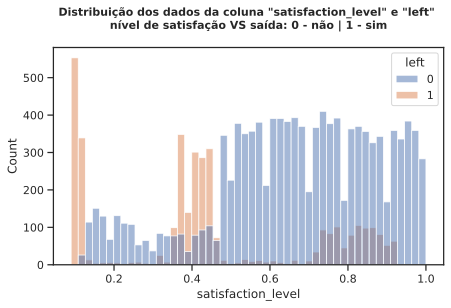

In [27]:
# visualizando a distribuição dos dados da coluna "satisfaction_level" e "left"
# nível de satisfação VS saída: 0 - não | 1 - sim
plt.figure(figsize=(7, 4))
plt.title('Distribuição dos dados da coluna "satisfaction_level" e "left" \nnível de satisfação VS saída: 0 - não | 1 - sim\n', 
         fontsize = 11, fontweight = 'bold')
sns.histplot(data=df, x='satisfaction_level', hue='left', bins=50);

> Com o gráfico acima, podemos fazer visualizar que, quanto menor o `nível de satisfação` maior e número de `saída`.

Essa `"correlação"` é uma apenas uma hipótese!

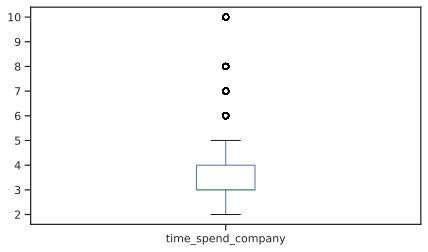

In [28]:
# visualizando a distribuição dos dados com o boxplot da variável "time_spend_company" - tempo de permanência na empresa
df['time_spend_company'].plot(kind='box', figsize=(7, 4));

> Com o gráfico de `boxplot`, aplicado na variável `tempo de permanência na empresa`, há valores que "fogem" do padrão, os chamados _outliers_.

Mas isso, se deve alto "`turnover`" da empresa, já que "condiciona" toda a estatística para valores mais baixos.

Como podemos ver que a `mediana`, praticamente se encontra visualmente próximo do primeiro quartil (25%).

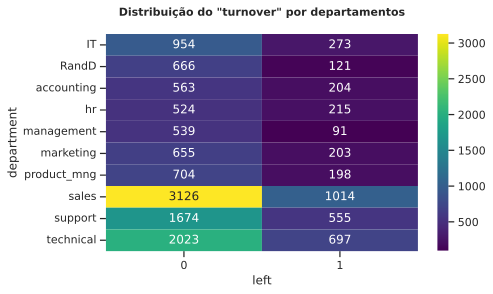

In [29]:
# com uso da função ".crosstab" do pandas e do heatmap do seaborn
# podemos visualizar em quais departamentos houve mais turnover de funcionários
plt.figure(figsize=(7, 4))
plt.title('Distribuição do "turnover" por departamentos\n', 
         fontsize = 11, fontweight = 'bold')
sns.heatmap(pd.crosstab(df['department'], df['left']), 
            annot=True, fmt='.5g', cmap='viridis');

In [30]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### **4.3. Análise exploratória de dados- estatística**

In [31]:
# estatística descritiva dos dados
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Vamos particionar os dados para melhorar a visualização estatística descritiva dos dados.

In [32]:
# quantidade de colunas
df.shape[1]     # número de colunas

10

In [33]:
# particionando a quantidade de colunas em duas variáveis
stats1 = df.iloc[:, :5]     # da primeira coluna até a quinta
stats2 = df.iloc[:, 5:]     # da quinta coluna até o final

In [34]:
# estatística descritiva do objeto "stats1" e, passando como argumento "(include='all')"
# que irar incluir além de dados numéricos também os categóricos
stats1.describe(include='all') 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [35]:
# estatística descritiva do objeto "stats2" e, passando como argumento "(include='all')"
stats2.describe(include='all')

,Work_accident,promotion_last_5years,department,salary,left
count,14999.000000,14999.000000,14999,14999,14999.000000
unique,NaN,NaN,10,3,NaN
top,NaN,NaN,sales,low,NaN
freq,NaN,NaN,4140,7316,NaN
mean,0.144610,0.021268,NaN,NaN,0.238083
std,0.351719,0.144281,NaN,NaN,0.425924
min,0.000000,0.000000,NaN,NaN,0.000000
25%,0.000000,0.000000,NaN,NaN,0.000000
50%,0.000000,0.000000,NaN,NaN,0.000000
75%,0.000000,0.000000,NaN,NaN,0.000000


> Veja que neste caso acima, tivemos a inclusão das duas colunas categóricas presente no conjunto de dados:    
- `departament` e
- `salary`.

In [36]:
# com a função ".T" podemos transpor a exibição
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0


Na função `".describe()"`, podemos passar como argumento `"include='O'"`, o seu retorno será somente das colunas categóricas.

In [37]:
# visualizando as frequências dos dados categóricos
df.describe(include='O')

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [38]:
# correlação entre as variáveis
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


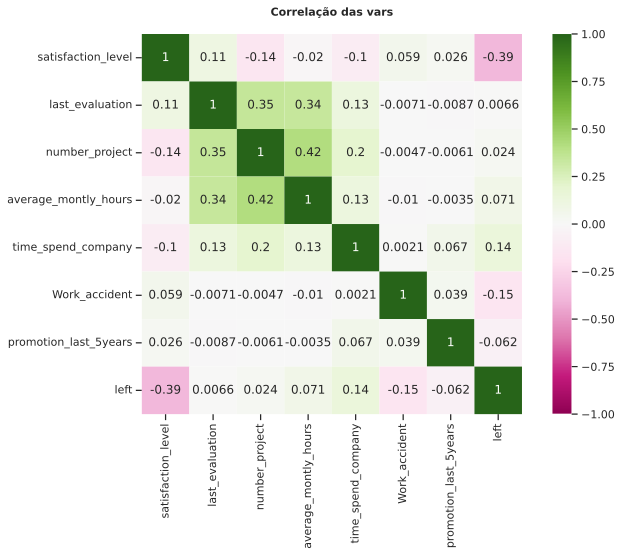

In [39]:
# tamanho da imagem
plt.figure(figsize=(11, 7))

# título da matriz de correlação
plt.title('Correlação das vars\n', 
                      {'fontsize': 11,'fontweight': 'bold'})
# mapa de calor
sns.heatmap(df.corr(), 
            vmax = 1., vmin = -1, square = True, annot=True, cmap="PiYG");

Vamos instalar a biblioteca `Researchpy` para auxiliar nas análises estatísticas.

_A **Researchpy** produz Pandas DataFrames que contêm informações de teste estatístico relevantes que são normalmente necessárias para pesquisas acadêmicas. As informações são retornadas como DataFrames do Pandas para permitir a exportação rápida e fácil dos resultados para qualquer formato / método que funcione com o DataFrame tradicional do Pandas. O researchpy é essencialmente um wrapper que combina vários pacotes estabelecidos, como pandas, scipy.stats e statsmodels para obter todas as informações padrão exigidas em um método. Se as análises não estivessem disponíveis nesses pacotes, o código foi desenvolvido para preencher a lacuna._

**Official Page:** https://pypi.org/project/researchpy/

In [40]:
# instalando a biblioteca
!pip install researchpy 

In [41]:
# importando a biblioteca
import researchpy as rp 

In [42]:
# criando uma função para auxiliar na visualização das avaliações estatísticas e das imagens gráficas
def categorical_analysis(data, index, col, figsize=(7, 4)):
    abs_tbl, test = rp.crosstab(data[index], data[col], 
                                test='chi-square', margins=False)
    row_tbl = rp.crosstab(data[index], data[col], prop='row')
    row_tbl = row_tbl.iloc[:-1, :-1]
    
    abs_tbl = abs_tbl.sort_values(('left', 1))
    row_tbl = row_tbl.sort_values(('left', 1))
    
    print(test)
    print('\n')
    
    _, ax = plt.subplots(1, 2, figsize=figsize, sharey=True)
    
    sns.heatmap(abs_tbl, annot=True, fmt='.5g', cbar=False, cmap='Blues', 
                annot_kws={'fontsize': 20}, ax=ax[0])
    sns.heatmap(row_tbl, annot=True, fmt='.5g', cbar=False, cmap='Greens', 
                annot_kws={'fontsize': 20}, ax=ax[1])
    plt.show();

Depois de criada a função tentaremos responder algumas questões de ordem estatśtica, como:     
- qual a relação entre o salário e a saída do funcionário?
- qual a relação entre o departamento e a saída do funcionário?

    Para validar ou anular nossas hipóteses, utilizaremos: 
    - Teste qui-quadrado de Pearson;  
    - Valor-p e,
    - V² de Cramer

Vamos entender melhor que cada um desses testes significa.

**Teste qui-quadrado de Pearson**

O `teste qui-quadrado (χ2) de Pearson` (ou `teste chi-quadrado de Pearson`) é um teste estatístico aplicado a dados categóricos para avaliar quão provável é que qualquer diferença observada aconteça ao acaso. É adequado para amostras não pareadas/emparelhadas. Dentre os diversos testes qui-quadrado existentes (por exemplo, a _correção de continuidade de Yates_, _teste da razão da máxima verossimilhança_, _teste de Portmanteau em séries temporais_, etc) é o mais utilizado.

(...)

Testa-se a [hipótese nula](https://pt.wikipedia.org/wiki/Hip%C3%B3tese_nula) afirmando-se que a [distribuição de frequências](https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_de_frequ%C3%AAncias) de um certo evento observado em uma [amostra](https://pt.wikipedia.org/wiki/Amostra_(estat%C3%ADstica)) é consistente com uma distribuição teórica particular. Os eventos considerados devem ser mutuamente excludentes e devem ter probabilidade total 1. Um caso comum para este teste é quando os eventos cobrem um valor de saída de uma variável categórica. Um simples exemplo é a hipótese de que um [dado](https://pt.wikipedia.org/wiki/Dado) de 6 lados é "honesto" (isto é, todos os sei possíveis valores - 1, 2, 3, 4, 5 e 6 - são equiprováveis).

- Fonte: https://pt.wikipedia.org/wiki/Teste_qui-quadrado_de_Pearson

De forma mais simplista.

O Teste qui-quadrado é um teste não-paramétrico que serve para comparar duas proporções quando os dados assumirem qualquer distribuição. Também testa o grau de associação entre as variáveis.

Para interpretar um teste Chi Quadrado de Pearson é preciso observar o p-valor resultante e também a tabela para verificarmos onde está essa diferença.

A interpretação segue de maneira bem simples. Considerando que p-valores abaixo de 0.05 são significativo, se o seu resultado é significativo é preciso observar a tabela e verificar onde está essa diferença. Caso contrário, dizemos que não há evidências o suficiente para mostrar a não homoneidade da tabela.

**Referências úteis**
- [Wikipedia](https://en.wikipedia.org/wiki/Chi-squared_test#Pearson's_chi-squared_test) sobre o teste Chi Quadrado de Pearson (em inglês)
- Livro Estatística Básica: Bussab, Wilton O., and Pedro A. Morettin. Estatística básica. São Paulo: Atual, 1986.

**Valor-p**

Na [estatística](https://pt.wikipedia.org/wiki/Estat%C3%ADstica) clássica, o `valor-p` (também chamado de `nível descritivo` ou `probabilidade de significância`), é a [probabilidade](https://pt.wikipedia.org/wiki/Probabilidade) de se obter uma estatística de teste igual ou mais extrema que aquela observada em uma amostra, sob a hipótese nula. Por exemplo, em testes de hipótese, pode-se rejeitar a [hipótese nula](https://pt.wikipedia.org/wiki/Hip%C3%B3tese_nula) a 5% caso o `valor-p` seja _menor que 5%_. Assim, uma outra interpretação para o `valor-p`, é que este é o menor nível de significância com que se rejeitaria a hipótese nula. Em termos gerais, um `valor-p` pequeno significa que a probabilidade de obter um valor da estatística de teste como o observado é muito improvável, levando assim à rejeição da hipótese nula.

Em um teste clássico de hipóteses, são definidas duas hipóteses, a _nula (Ho)_ e a _alternativa (Ha)_. Em muitas aplicações da estatística, convenciona-se definir a hipótese alternativa como a hipótese formulada pelo pesquisador, enquanto a hipótese nula é o seu complemento. A princípio, a hipótese nula é considerada a verdadeira. Ao confrontarmos a hipótese nula com os achados de uma amostra aleatória tomada de uma população de interesse, verifica-se a sua plausibilidade em termos probabilísticos, o que nos leva a rejeitarmos ou não Ho. Se não rejeitamos Ho, tomamos como sendo verdadeira; caso contrário, tomamos Ha como verdadeira.

- Fonte: https://pt.wikipedia.org/wiki/Valor-p

Se o valor-p for menor que 0.05, devemos rejeitar a hipótese nula de que não há diferença entre as médias e concluir que existe uma diferença significativa. Se o valor-p for maior que 0.05, não é possível concluir que existe uma diferença significativa.

    P-value            |  Interpretação
    -------------------|-----------------------------------------
    P < 0,01	       |  evidência muito forte contra H0
    0,01 < = P < 0,05  |  evidência moderada contra H0
    0,05 < = P < 0,10  |  evidência sugestiva contra H0
    0,10 < = P	     |  pouca ou nenhuma evidência real contra H0


**V-quadrado de Cramer**

_Os valores altos do V² de Cramer indicam uma relação mais forte entre as variáveis, e os valores menores para o V² indicam uma relação fraca._
 - valor próximo de `0` indica que **não existe uma associação**. 
 - valor próximo de `1` indica que **não há uma associação muito forte entre as variáveis**.

- Fonte: https://en.wikipedia.org/wiki/Cram%C3%A9r's_V

Depois dessa breve introdução, agora vamos aplicar nossos teste e análises.

                Chi-square test   results
0  Pearson Chi-square ( 2.0) =   381.2250
1                    p-value =     0.0000
2                 Cramer's V =     0.1594




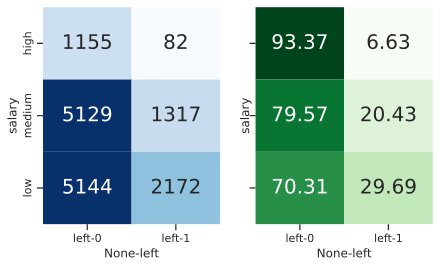

In [43]:
# visualizando a relação entre as colunas "salary" e "left"
categorical_analysis(df, 'salary', 'left', figsize=(7, 4))

                Chi-square test  results
0  Pearson Chi-square ( 9.0) =   86.8255
1                    p-value =    0.0000
2                 Cramer's V =    0.0761




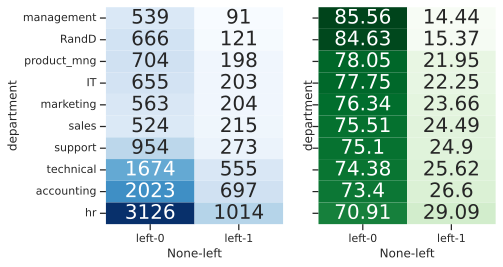

In [44]:
# visualizando a relação entre as colunas "department" e "left"
categorical_analysis(df, 'department', 'left')

Diante dos resultados dos testes, podemos inferir que não há evidências estatísticas que as variáveis `salary` e `department` explica a nossa variável dependente, nesse caso `left`.

## **5. Preparação do conjunto de dados**

In [45]:
# visualizando a nossa base de dados
df.head() # por padrão é exibido as 5 primeiras linhas

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [46]:
# # se for de interesse a exibição de mais linhas
# # podemos passar como argumento a quantidade desejada
# df.head(15).T # exibindo as 15 primeiras linhas e realizando a transposição das colunas

In [47]:
# # exibindo as 5 últimas linhas 
# df.tail() # por padrão, é exibido as 5 últimas linhas

In [48]:
# # e também análogo ao ".head()" podemos passar a quantidade de linhas para exibir
# df.tail(10).T   # realizando a transposição

In [49]:
# exibindo as instâncias únicas da coluna "department"
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

> Temos dados categóricos.

In [50]:
# criando uma função para separar as colunas numéricas e categóricas do dataframe
def separate_cols(df):
    cols_cats = []
    cols_nums = []

    for col in df.columns[:-1]:     # excluindo a último coluna - o alvo
        if df.dtypes[col] == 'object':
            cols_cats.append(col)
        else:
            cols_nums.append(col)
    
    return f'cols categ: {len(cols_cats), cols_cats}', f'cols nums: {len(cols_nums), cols_nums}'

In [51]:
# aplicando a função no df
separate_cols(df)

("cols categ: (2, ['department', 'salary'])",
 "cols nums: (7, ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years'])")

> Note que, temos as colunas `department` e `salary` como sendo categóricas.

Vamos ter que tratar dessas duas colunas em questão e, pra cada qual iremos adotar uma estratégia própria.

In [52]:
# criando uma cópia do conjunto de dados
df2 = df.copy()

Utilizando a função do **pandas** a `".get_dummies()"`, iremos realizar uma transformação, onde cada instância (categória) terá uma distinção numérica e uma coluna própria.

In [53]:
# exibindo novamente as instâncias únicas da coluna "department"
df2['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

> Pra cada instância presente, a função `".get_dummies()"` irar criar uma coluna distinta.

In [54]:
# realizando a transformação das instâncias categóricas da coluna "department"
df2 = pd.get_dummies(df2, columns=['department'], drop_first=True)

In [55]:
# quantidade de colunas antes e após a transformação
f'Antes: {df.shape[1]} linhas', f'Depois: {df2.shape[1]} linhas'

('Antes: 10 linhas', 'Depois: 18 linhas')

In [56]:
# visualizando todas colunas após transformação
df2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'left', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

In [57]:
# visualizando as novas colunas criadas
df2.iloc[:, -9:].head(30).T    # 30 linhas - exibição transposta

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
department_RandD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
department_accounting,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
department_hr,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
department_management,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
department_marketing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
department_product_mng,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
department_sales,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
department_support,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
department_technical,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Agora vamos tratar da coluna `salary`.

In [58]:
# exibindo as instâncias únicas da coluna
df2['salary'].unique() 

array(['low', 'medium', 'high'], dtype=object)

In [59]:
# contabilizando as instâncias e seus valores absolutos
df2['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [60]:
# contabilizando as instâncias e seus valores relativos
df2['salary'].value_counts(normalize=True) * 100

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

In [61]:
# realizando a transformação das instâncias categóricas da coluna "salary"
df2['salary'] = pd.Categorical(df2['salary'], 
                              categories=['low', 'medium', 'high'], ordered=True)

In [62]:
# visualizando após a transformação as instâncias únicas e contabilizando-as 
print(f"{df2['salary'].unique()} \n\n{df2['salary'].value_counts()}")

['low', 'medium', 'high']
Categories (3, object): ['low' < 'medium' < 'high'] 

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


Agora iremos realizar um mapeamento da coluna `salary`, para isso utilizaremos a função `".map()"`, onde cada instância categórica iremos atribuir um valor numérico.

In [63]:
# aplicando a função ".map()" e como argumeto um dicionário
df2['salary'] = df2['salary'].map({'low': 1, 'medium': 2, 'high': 3})

In [64]:
# visualizando a transformação
df2['salary'].value_counts()

1    7316
2    6446
3    1237
Name: salary, dtype: int64

In [65]:
# distribuição relativa 
df2['salary'].value_counts(normalize=True) * 100

1    48.776585
2    42.976198
3     8.247216
Name: salary, dtype: float64

In [66]:
# contabilizando os valores de cada instância numérica da coluna 
# após a transformação e seus valores únicos
print(df2['salary'].value_counts(), '\n\n', df2['salary'].unique())

1    7316
2    6446
3    1237
Name: salary, dtype: int64 

 [1, 2, 3]
Categories (3, int64): [1 < 2 < 3]


## **6. Aplicando técnicas de aprendizagem de máquina**

Utilizaremos três técnicas:  
- Regressão logística;
- Árvore de decisão e,
- Floresta aleatória.

Lembrando que o nosso problema é de **classificação**.

### **6.1. Preparando os dados**

In [67]:
# importando da biblioteca do sklearn do módulo "model_selection" a função "train_test_split"
# essa função tem a finalidade de dividir a base de dados em treino e teste
from sklearn.model_selection import train_test_split

In [68]:
# # instanciando as variáveis independentes (X) e dependente - alvo (y) 
# X = df2.drop(columns='left')     # com a função ".drop()" estamos removendo a coluna alvo (left) da variável "X"
# y = df2['left'] # instanciando nosso target, nesse caso a coluna "left"

In [69]:
# separando as variáveis explicativas (X) e a resposta (y)
X = df2.drop(labels=['left'], axis=1)
y = df2['left'].values

In [70]:
# visualizando a dimensão das variáveis
X.shape, y.shape

((14999, 17), (14999,))

Para cada parte da base de dados de `"X"` e  de `"y"`, iremos dividi-los em duas partes - treino e teste.

Utilizaremos a função `"train_test_split()"` e passando como argumento as variávies `"X"` e `"y"` e o `"random_state=42"` e,  atribuiremos os resultados nas variáveis `"X_train"`, `"X_test"`, `"y_train"`, `"y_test"`.

In [71]:
# aplicando a divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)

In [72]:
# visualizando as quantidades em cada subconjunto de dados
print('\tX')
print('Treinamento:', len(X_train))
print('Teste:      ', len(X_test))
print('\n\ty')
print('Treinamento:', len(y_train))
print('Teste:      ', len(y_test))

	X
Treinamento: 10499
Teste:       4500

	y
Treinamento: 10499
Teste:       4500


### **6.2. Regressão logística**

In [73]:
# importando da biblioteca do sklearn e do módulo "linear_model" a função "LogisticRegression"
from sklearn.linear_model import LogisticRegression

In [74]:
# instanciando o modelo na variável "logreg"
logreg = LogisticRegression(solver='liblinear')

In [75]:
# treinando o modelo com as bases de dados de treino
logreg .fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Importaremos da biblioteca do **sklearn** e do módulo `"metrics"` 
as seguintes funções:    
- `"classification_report"` e 
- `"plot_confusion_matrix"`

A primeira função tem a finalidade de avaliar a performance do modelo em uso e retornar um _relatório com as métricas de avaliação_. 

Já a segunda, irar exibir graficamente a chamada _matriz de confusão 
com acertos e erros do modelo_.

**Relatório de classificação**


A `classification_report` é uma função que cria um relatório de texto mostrando as principais métricas de classificação.

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report

**Matriz de confusão**

Em análise preditiva, a `matriz de confusão` (às vezes também chamada de _'matriz de erro'_ ou _'tabela de confusão'_) é uma tabela com duas linhas e duas colunas que relata o número de `falsos positivos`, `falsos negativos`, `verdadeiros positivos` e `verdadeiros negativos`.

No campo do **Aprendizado de Máquina** uma _matriz de confusão_ é uma tabela que permite a visualização do desempenho de um algoritmo de classificação
- Fonte: https://pt.wikipedia.org/wiki/Matriz_de_confus%C3%A3o

In [76]:
# importando a função
from sklearn.metrics import classification_report, plot_confusion_matrix

In [77]:
# iremos criar uma função para otimizar a aplicação do modelo
#  e a exibição do relatório e da matriz de confusão
def classification_results(classifier, x_test, y_test, cmap='Blues'):
    print('Resultados do modelo:', classifier.__class__.__name__)
    
    y_pred = classifier.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    
    plot_confusion_matrix(classifier, X_test, y_test, cmap=cmap);

Resultados do modelo: LogisticRegression
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3428
           1       0.59      0.35      0.44      1072

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.65      4500
weighted avg       0.77      0.79      0.77      4500



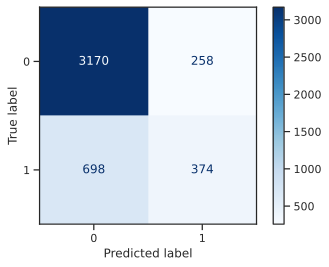

In [78]:
# aplicando a função criada e passando como argumentos o modelo 
# e as bases de teste - "X_test" e "y_test" para avaliação do modelo 
classification_results(logreg , X_test, y_test)

> Podemos visualizar que, para essa aplicação o modelo apresentou uma baixa performance.

Tivemos um número alto de classificação para `falsos positivos`, `total de 258` e, de `falsos negativos de 698 classificações`.

Esse modelo iremos descartá-lo!


Vamos para outra técnica!

### **6.3. Árvore de decisão**

In [79]:
# importando da biblioteca do sklearn do módulo "tree" a função "DecisionTreeClassifier"
from sklearn.tree import DecisionTreeClassifier

In [80]:
# instanciando o modelo na variável "dectree"
dectree = DecisionTreeClassifier(class_weight='balanced')

# treinando o modelo com as bases de treino
dectree .fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

Resultados do modelo: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3428
           1       0.93      0.96      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.96      0.97      0.96      4500
weighted avg       0.97      0.97      0.97      4500



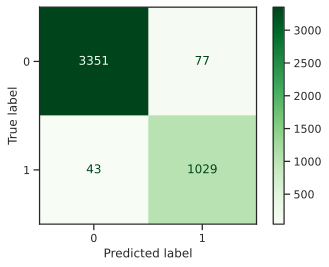

In [81]:
# aplicando a função criada e passando como argumentos o modelo
# as bases de teste - "X_test" e "y_test" e o mapa de cor da matriz
classification_results(dectree , X_test, y_test, cmap='Greens')

> Esse modelo já apresentou uma performance aceitável.

Aqui o número de classificação para `falsos positivos foi de 77` e para `falsos negativos de 43`. 

Realmente uma melhora considerável que o anterior!

Vamos seguir em frente e aplicar o último modelo.

### **6.4. Floresta aleatória**

In [82]:
# importando do sklearn do módulo "ensemble" a função "RandomForestClassifier"
from sklearn.ensemble import RandomForestClassifier

Resultados do modelo: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.95      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500



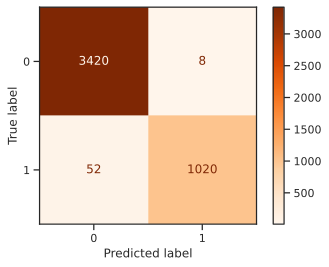

In [83]:
# instanciando o modelo na variável "randfor"
randfor = RandomForestClassifier(class_weight='balanced')

# treinando o modelo com as bases de treino
randfor.fit(X_train, y_train)

# aplicando a função criada e passando como argumentos o modelo
# as bases de teste - "X_test" e "y_test" e o mapa de cor da matriz
classification_results(randfor, X_test, y_test, cmap='Oranges')


> Esse modelo apresentou uma performance ainda melhor que o anterior.

O número de classificação para `falsos positivos foi de apenas 8` e para `falsos negativos de 52`. 
 - um detalhe aqui que chama atenção é sobre a classificação de **falsos negativos**, os valores foram próximos ao modelo da `Árvore de decisão`.

Mas no geral, esse modelo performou muito bem. E ele será o nosso modelo final!

## **7. Avaliação final**

In [84]:
# instanciando as features de maior importância para a predição do nosso target
feats = pd.Series(randfor.feature_importances_, index = X_train.columns)

In [85]:
# ordenando do maior para o menor
feats.sort_values(inplace=True) 

In [86]:
# imprimindo as features de maior importância
feats.sort_values()*100

department_product_mng     0.096314
department_marketing       0.135209
department_management      0.160707
department_RandD           0.180226
department_accounting      0.191353
department_hr              0.228621
department_support         0.237942
promotion_last_5years      0.262455
department_sales           0.401680
department_technical       0.500214
Work_accident              1.236021
salary                     1.349881
last_evaluation           13.773347
average_montly_hours      15.301905
number_project            15.678748
time_spend_company        22.699518
satisfaction_level        27.565858
dtype: float64

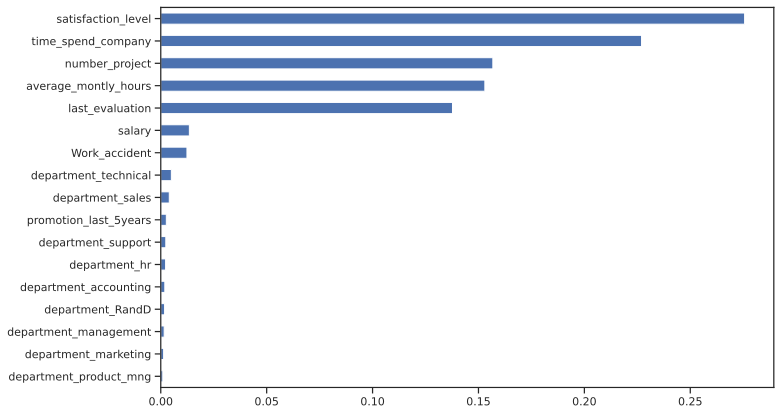

In [87]:
# visualizando de forma gráfica com auxílio do gráfico de barras 
# as features de maior importância
feats.plot(kind='barh', figsize=(11, 7));

> Chegamos à conclusão que as variáveis acima no gráfico são as que mais explica o `turnover`.


In [88]:
# visualizando a porcentagem de "explicação" para a variável alvo
pd.DataFrame(feats.sort_values()*100, columns=['Percentual de explicação']).tail()

,Percentual de explicação
last_evaluation,13.773347
average_montly_hours,15.301905
number_project,15.678748
time_spend_company,22.699518
satisfaction_level,27.565858


In [89]:
# biblioteca para aplicação do modelo 
import pickle

In [90]:
# salvando o modelo escolhido em um arquivo
pickle.dump(randfor, 
            open('turnover.sav', mode='wb'))  # "wb" - write binary

In [91]:
# instanciando o modelo no objeto "arquivo"
arquivo = open('turnover.sav', mode='rb')    # "rb" - read binary

# realizando a leitura do modelo
modelo = pickle.load(arquivo)

print(modelo)   # visualizando o modelo

RandomForestClassifier(class_weight='balanced')


## **8. Considerações finais**

Conseguimos identificar as 5 principais causas do `turnover` e, o setor de RH da empresa poderia usar este modelo para avaliar e agilizar o processo de análise da pesquisa interna do _"Clima Organizacional"_ e, assim poderia traçar planos de ação para contenção de talentos e mitigar os fatores que causam o **turnover**.

## **9. Material de apoio**

- [Entendendo o que é Matriz de Confusão com Python](https://bit.ly/3GIjdzO)
- [Scikit-learn](https://bit.ly/3BxHzsk)

## **10. Outros**

In [92]:
# visualizando a versão do Python utilizado neste notebook
from platform import python_version
print(f'Versão Python: {python_version()}')

Versão Python: 3.7.12


In [93]:
# instalando a biblioteca "watermark"
!pip install -q -U watermark 
# esse pacote é usado para gravar as versões dos pacotes usados neste notebook

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlflow 1.21.0 requires importlib-metadata!=4.7.0,>=3.7.0, but you have importlib-metadata 2.1.2 which is incompatible.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 2.1.2 which is incompatible.


In [94]:
# versões das bibliotecas utilizadas neste notebook
%reload_ext watermark
%watermark -a 'RGM: 22458646 - Fernando Galvão | PROJETO E APLICAÇÃO DE MINERAÇÃO DE DADOS #UNICID 2021' --iversions

Author: RGM: 22458646 - Fernando Galvão | PROJETO E APLICAÇÃO DE MINERAÇÃO DE DADOS #UNICID 2021

seaborn   : 0.11.2
missingno : 0.5.0
pandas    : 1.1.5
researchpy: 0.3.2
matplotlib: 3.2.2
IPython   : 5.5.0

